In [1]:
pip install yfinance

In [2]:
  # Fetching data from Yahoo Finance(yfinance)
import yfinance as yf
df=yf.download('TSLA',start="2000-01-01",end="2025-03-04")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
#Printing top few rows of the dataset
df.head(10)

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
2010-07-07,1.053333,1.108667,0.998667,1.093333,103825500
2010-07-08,1.164000,1.168000,1.038000,1.076000,115671000
2010-07-09,1.160000,1.193333,1.103333,1.172000,60759000


# Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning & Preprocessing

In [5]:
# Checking missing/null values from the dataset
df.isnull().sum()

,,0
Price,Ticker,
Close,TSLA,0
High,TSLA,0
Low,TSLA,0
Open,TSLA,0
Volume,TSLA,0


In [6]:
# Checking duplicates
df.duplicated().sum()

0

In [7]:
# Renaming columns
df.columns=df.columns.get_level_values(0)
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [8]:
# Checking shape of the dataset
df.shape

(3692, 5)

In [9]:
# Checking Summary Of the dataset
df.info()#

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3692 entries, 2010-06-29 to 2025-03-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3692 non-null   float64
 1   High    3692 non-null   float64
 2   Low     3692 non-null   float64
 3   Open    3692 non-null   float64
 4   Volume  3692 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 173.1 KB


In [10]:
# Statistical summary
df.describe()

Price,Close,High,Low,Open,Volume
count,3692.000000,3692.000000,3692.000000,3692.000000,3.692000e+03
mean,84.679272,86.583019,82.716495,84.724796,9.649677e+07
std,111.280886,113.897252,108.640203,111.413045,7.735903e+07
min,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,12.226501,12.447833,12.011500,12.238833,4.938900e+07
50%,18.326334,18.641334,17.938334,18.325000,8.195580e+07
75%,182.869999,186.305000,178.772499,182.982506,1.216402e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [11]:
# Outliers detection using IQR
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Price
Close     1.706435e+02
High      1.738572e+02
Low       1.667610e+02
Open      1.707437e+02
Volume    7.225125e+07
dtype: float64


In [12]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

Price
Close    -2.437387e+02
High     -2.483379e+02
Low      -2.381300e+02
Open     -2.438767e+02
Volume   -5.898788e+07
dtype: float64
Price
Close     4.388352e+02
High      4.470908e+02
Low       4.289140e+02
Open      4.390980e+02
Volume    2.300171e+08
dtype: float64


In [13]:
# Fixing lower bound (negative values issue)
lower_bound=np.maximum(Q1-1.5*IQR,0)
upper_bound=Q3+1.5*IQR
print(lower_bound)

Price
Close     0.0
High      0.0
Low       0.0
Open      0.0
Volume    0.0
dtype: float64


In [14]:
# Now checking outliers
outliers=(df<lower_bound)|(df>upper_bound)
print(outliers.dropna())

Price       Close   High    Low   Open  Volume
Date                                          
2010-06-29  False  False  False  False    True
2010-06-30  False  False  False  False    True
2010-07-01  False  False  False  False   False
2010-07-02  False  False  False  False   False
2010-07-06  False  False  False  False   False
...           ...    ...    ...    ...     ...
2025-02-25  False  False  False  False   False
2025-02-26  False  False  False  False   False
2025-02-27  False  False  False  False   False
2025-02-28  False  False  False  False   False
2025-03-03  False  False  False  False   False

[3692 rows x 5 columns]


In [15]:
# Checking outliers count
outliers.sum()

,0
Price,
Close,5
High,7
Low,4
Open,6
Volume,211


In [16]:
# Capping for < 10 outliers
cols=['Close','High','Low','Open']
for col in cols:
    df[col]=df[col].clip(lower=lower_bound[col],upper=upper_bound[col])

In [17]:
# Log transform for feature(Volume)
df['Volume']=np.log1p(df['Volume'])

In [18]:
# Recalculating outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lower_bound=np.maximum(Q1-1.5*IQR,0)
upper_bound=Q3+1.5*IQR
outliers=(df<lower_bound)|(df>upper_bound)
outliers.sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,261


In [19]:
from scipy.stats.mstats import winsorize
df["Volume"]=winsorize(df["Volume"],(0.1,0.1))
((df < lower_bound) | (df > upper_bound)).sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0


In [20]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_norm.head()

Price,Close,High,Low,Open,Volume
0,0.001232,0.001251,0.000399,0.000435,1.000000
1,0.001223,0.002061,0.001296,0.001469,1.000000
2,0.000938,0.001389,0.000824,0.001348,0.837515
3,0.000518,0.000967,0.000581,0.001044,0.646584
4,0.000047,0.000504,0.000132,0.000587,0.764418


# Data Visualization & EDA

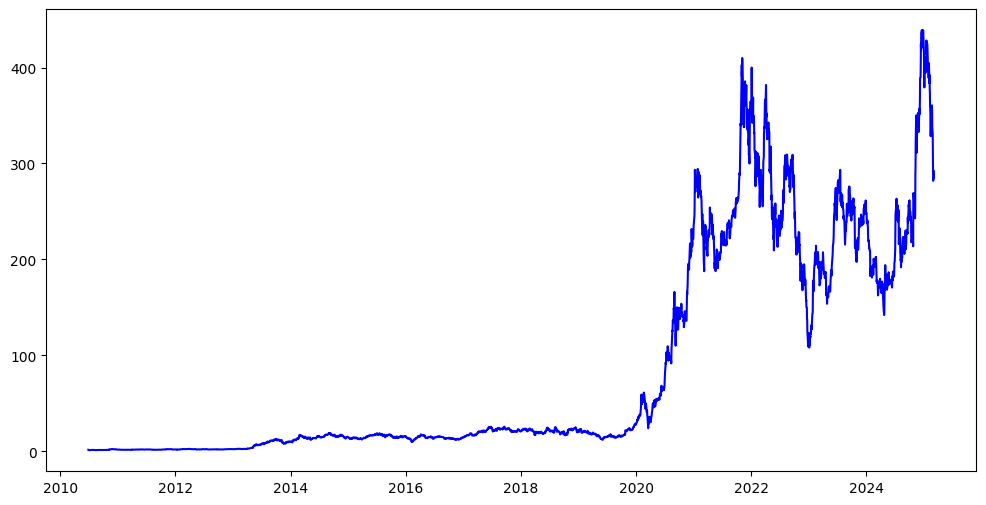

In [21]:
# Line plot (Closing price trend)
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Tesla Closing Price',color='blue')
plt.title=('Tesla Closing Price Trend')
plt.xlabel=('Date')
plt.ylabel=('Closing Price')
plt.show()

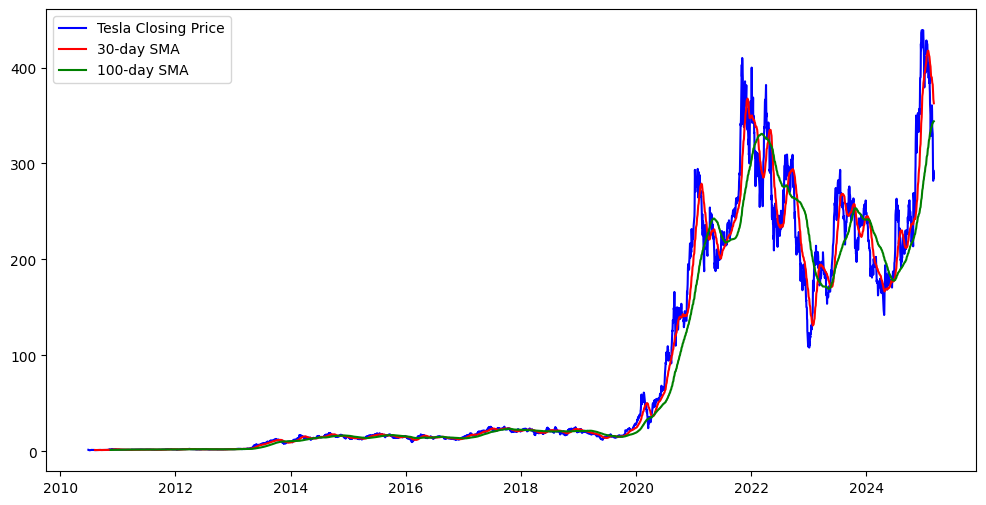

In [22]:
# Moving average plot (short term vs long term trend)
df['SMA_30']=df['Close'].rolling(window=30).mean()
df['SMA_100']=df['Close'].rolling(window=100).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Tesla Closing Price',color='blue')
plt.plot(df.index,df['SMA_30'],label='30-day SMA',color='red')
plt.plot(df.index,df['SMA_100'],label='100-day SMA',color='green')
plt.title=('Tesla Closing Price & Moving Averages')
plt.xlabel=('Date')
plt.ylabel=('Closing Price')
plt.legend()
plt.show()

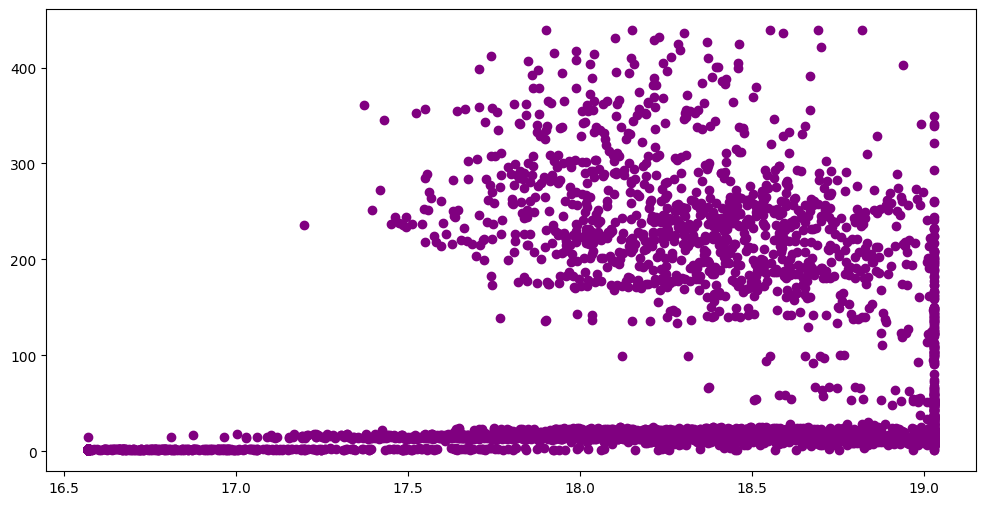

In [23]:
# Volume vs price
plt.figure(figsize=(12,6))
plt.scatter(df['Volume'],df['Close'],color='purple')
plt.title=('Volume vs Price')
plt.xlabel=('Volume')
plt.ylabel=('Closing Price')
plt.show()

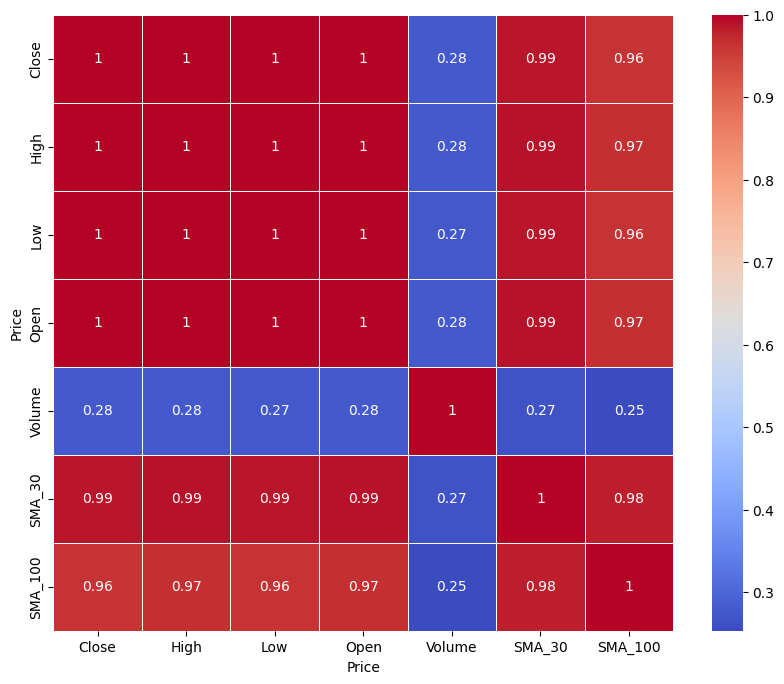

In [24]:
# Corelation heatmap
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

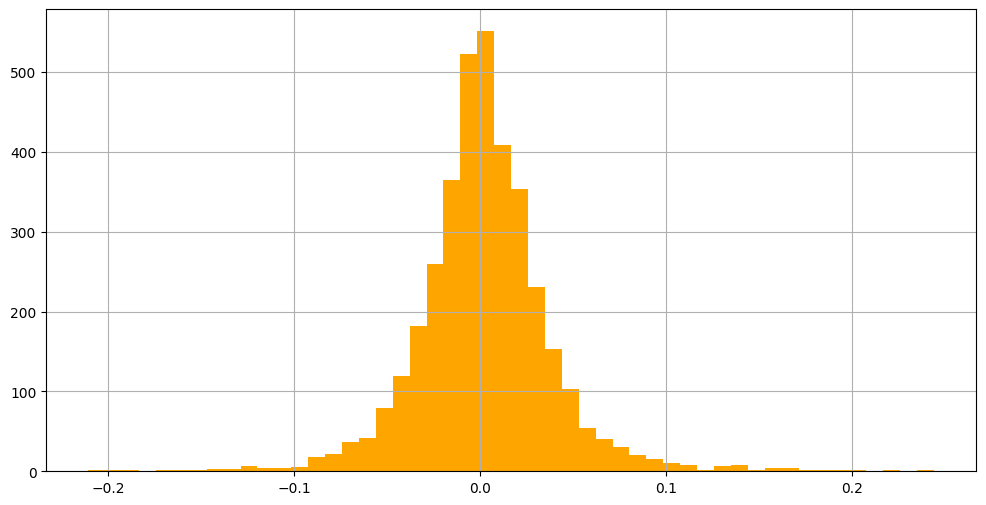

In [25]:
# Daily returns histogram
df['Daily_Return']=df['Close'].pct_change()
df['Daily_Return'].hist(bins=50,figsize=(12,6),color='orange')
plt.title=('Daily Returns Histogram')
plt.xlabel=('Daily Returns')
plt.ylabel=('Frequency')
plt.show()

In [26]:
# Candlestick chart(Price action visualization)
import plotly.graph_objects as go
fig=go.Figure(data=[go.Candlestick(x=df.index,open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])])
fig.update_layout(title='Tesla Stock Price',xaxis_title='Date',yaxis_title='Price')
fig.show()

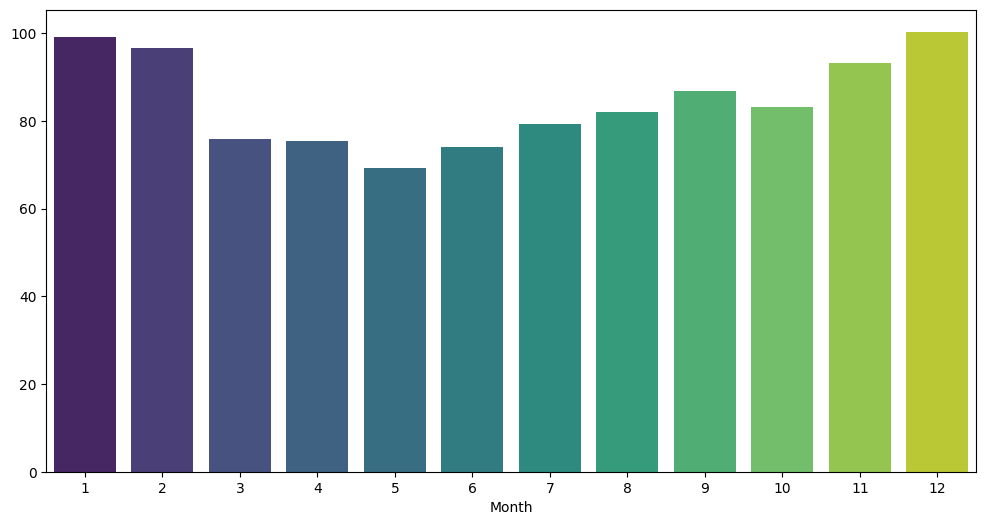

In [27]:
# Monthly price trend analysis
df['Month']=df.index.month
monthly_trend=df.groupby('Month')['Close'].mean()
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_trend.index,y=monthly_trend.values,palette='viridis')
plt.title=('Monthly Average Closing Price')
plt.xlabel=('Month')
plt.ylabel=('Average Closing Price')
plt.show()

# LSTM Training

In [28]:
# Creating testinf & training data
train_size=int(len(df_norm)*0.8)
train_data=df_norm[:train_size]
test_data=df_norm[train_size:]

def create_sequences(data,seq_length):
    x=[]
    y=[]
    for i in range(len(data)-seq_length):
        x.append(data[i:(i+seq_length)])
        y.append(data.iloc[i+seq_length]['Close'])
    return np.array(x),np.array(y)

seq_length=60
x_train,y_train=create_sequences(train_data,seq_length)
x_test,y_test=create_sequences(test_data,seq_length)

In [29]:
# Reshaping for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2])  # Keep all 5 features
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])  # Keep all 5 features

# LSTM Model Design

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

# LSTM model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [31]:
# Compiling model
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,651 (201.76 KB)

 Trainable params: 51,651 (201.76 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Model training
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 25s 170ms/step - loss: 0.0081 - val_loss: 0.0059
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 9.8262e-04 - val_loss: 0.0048
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 8.2530e-04 - val_loss: 0.0025
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - loss: 8.6569e-04 - val_loss: 0.0023
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 

# Model Evaluation & Predictions

In [33]:
predictions=model.predict(x_test)
predictions=predictions.reshape(-1,1)
predictions=scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 4))), axis=1))[:, 0]

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


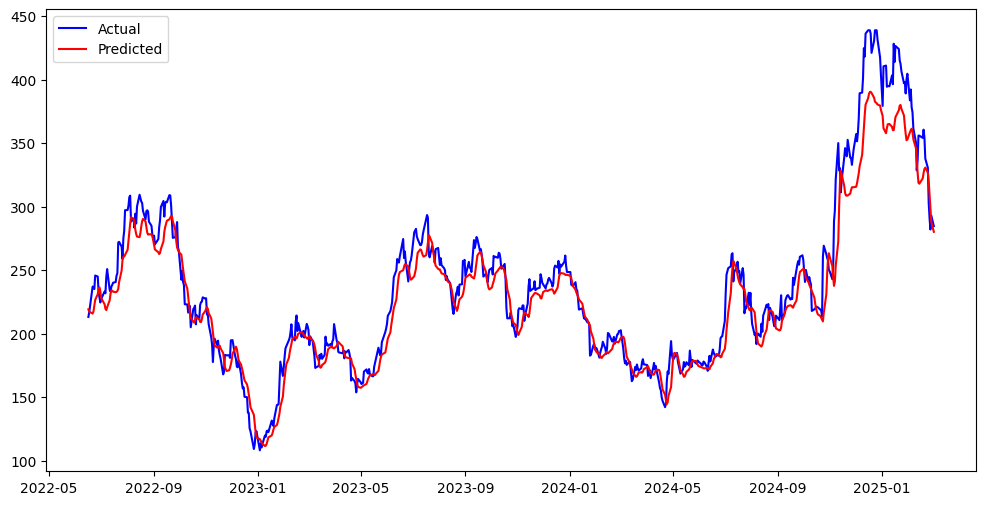

In [34]:
# Plotting actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size+seq_length:],df['Close'][train_size+seq_length:],label='Actual',color='blue')
plt.plot(df.index[train_size+seq_length:],predictions,label='Predicted',color='red')
plt.title=('Actual vs Predicted Closing Price')
plt.xlabel=('Date')
plt.ylabel=('Closing Price')
plt.legend()
plt.show()

In [35]:
# Checking model performance
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(df['Close'][train_size+seq_length:],predictions)
mae=mean_absolute_error(df['Close'][train_size+seq_length:],predictions)
rmse=np.sqrt(mse)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('Root Mean Squared Error:',rmse)

Mean Squared Error: 318.29802798842763
Mean Absolute Error: 12.808183073201898
Root Mean Squared Error: 17.840908833028312


# Future predictions using LSTM

In [36]:
last_60_days = df_norm[-60:]

# Reshaping for LSTM input
last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], last_60_days.shape[1]))

In [37]:
future_days = 30  # Number of days to predict
future_predictions = []

# Use last 60 days as initial input
input_seq = last_60_days.copy()

for _ in range(future_days):
    # Reshape to (1, 60, 5) to match LSTM input
    X_future = input_seq.reshape(1, 60, 5)
    next_price = model.predict(X_future)  # Predict next day

    # Append predicted closing price
    future_predictions.append(next_price[0][0])

    # Create new row with predicted 'Close' and zeros for other features
    new_row = np.array([next_price[0][0], 0, 0, 0, 0]).reshape(1, 1, 5)

    # Update input sequence (remove first row, add new prediction)
    input_seq = np.concatenate([input_seq[:, 1:, :], new_row], axis=1)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(
    np.concatenate((np.array(future_predictions).reshape(-1,1), np.zeros((future_days, 4))), axis=1)
)[:, 0]

# Print predicted prices
for i, price in enumerate(future_predictions, 1):
    print(f"📌 Predicted Price for Day {i}: {price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

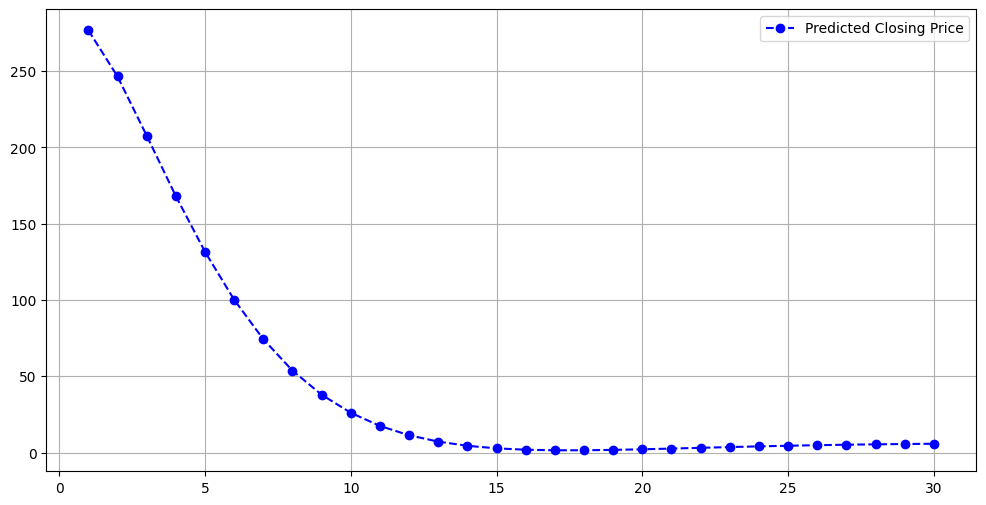

In [38]:
# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(range(1, future_days+1), future_predictions, marker='o', linestyle='dashed', color='blue', label="Predicted Closing Price")

plt.xlabel=("Future Days")
plt.ylabel=("Stock Price")
plt.title=("Tesla Stock Price - 30 Days Future Prediction")
plt.legend()
plt.grid()
plt.show()

In [39]:
print(future_predictions)

[276.69765127 246.41619883 207.65257987 168.01597859 131.56881378
 100.13360283  74.24727209  53.69980532  37.88904812  26.05653913
  17.43517014  11.329379     7.14850726   4.41189344   2.73908288
   1.83452377   1.47160418   1.47854514   1.72642353   2.11968699
   2.58880196   3.08420321   3.57172412   4.02899249   4.44239061
   4.80494162   5.11431992   5.37159209   5.58005574   5.74432296]


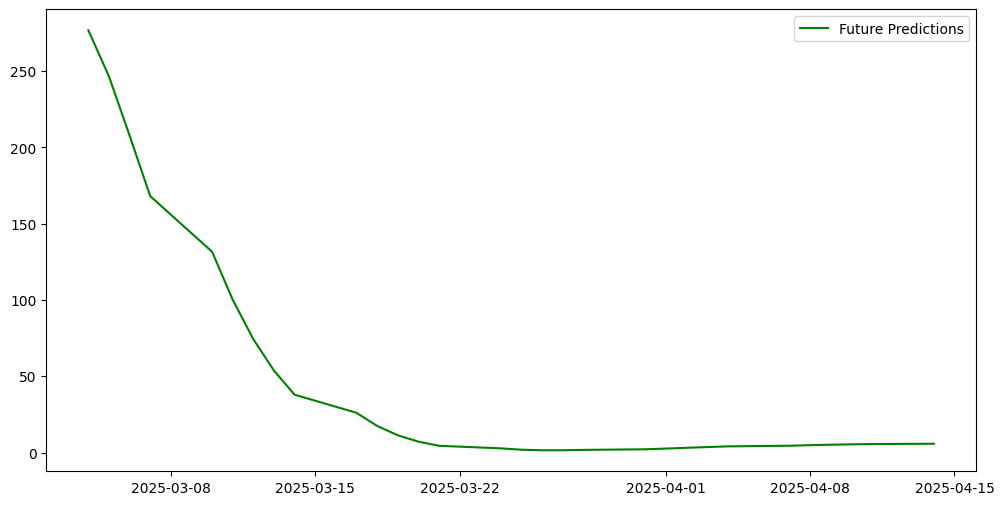

In [41]:
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='B')[1:]
plt.figure(figsize=(12,6))
plt.plot(future_dates, future_predictions, label='Future Predictions', color='green')
plt.title=('Future 30 Days Predicted Closing Price')
plt.xlabel=('Date')
plt.ylabel=('Price')
plt.legend()
plt.show()

In [43]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.4 MB/s eta 0:00:00


In [44]:
# Hyperparameter Tuning
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   return_sequences=True, input_shape=(60, 5)))
    model.add(Dropout(hp.Choice('dropout', values=[0.2, 0.3, 0.4])))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50)))
    model.add(Dropout(hp.Choice('dropout', values=[0.2, 0.3, 0.4])))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    return model

tuner = RandomSearch(build_model, objective='val_loss', max_trials=5, directory='tuner_dir')
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 04m 29s]
val_loss: 0.001486621331423521

Best val_loss So Far: 0.0011844976106658578
Total elapsed time: 00h 18m 17s


In [45]:
test_loss = best_model.evaluate(x_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 9.7769e-04
Test Loss (MSE): 0.0011844976106658578


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


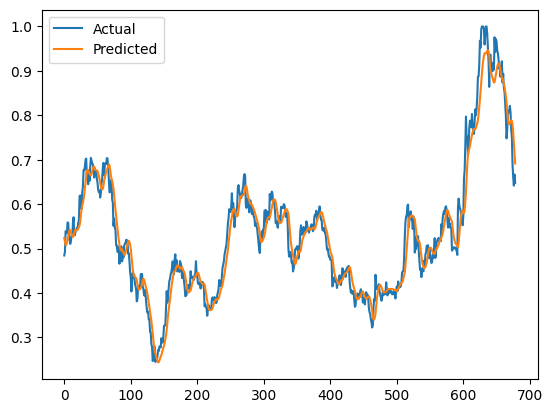

In [46]:
y_pred = best_model.predict(x_test)

# If you want to visualize
import matplotlib.pyplot as plt
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()

In [47]:
future_days = 30
future_predictions = []

input_seq = x_test[-1].reshape(1, 60, 5)

for _ in range(future_days):
    next_price = best_model.predict(input_seq)
    future_predictions.append(next_price[0, 0])

    # Update input sequence by shifting and adding the new prediction
    input_seq = np.roll(input_seq, -1, axis=1)
    input_seq[0, -1, 0] = next_price

# Converting back from scaled values if necessary
future_predictions = scaler.inverse_transform(np.concatenate((np.array(future_predictions).reshape(-1,1),
                                                              np.zeros((30, 4))), axis=1))[:, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━

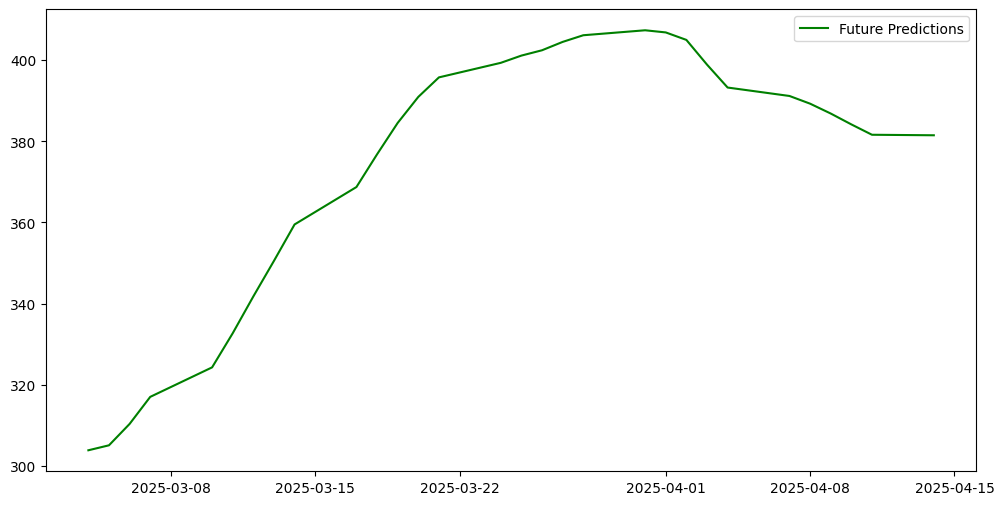

In [49]:
# Ploting future predictions
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='B')[1:]
plt.figure(figsize=(12,6))
plt.plot(future_dates, future_predictions, label="Future Predictions", color="green")
plt.title=("Future 30 Days Predicted Closing Price")
plt.xlabel=("Date")
plt.ylabel=("Price")
plt.legend()
plt.show()

In [51]:
for date, price in zip(future_dates, future_predictions):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.2f}")

2025-03-04: 303.81
2025-03-05: 305.04
2025-03-06: 310.31
2025-03-07: 316.98
2025-03-10: 324.26
2025-03-11: 332.67
2025-03-12: 341.75
2025-03-13: 350.52
2025-03-14: 359.50
2025-03-17: 368.72
2025-03-18: 376.79
2025-03-19: 384.53
2025-03-20: 390.95
2025-03-21: 395.76
2025-03-24: 399.35
2025-03-25: 401.13
2025-03-26: 402.45
2025-03-27: 404.51
2025-03-28: 406.15
2025-03-31: 407.38
2025-04-01: 406.85
2025-04-02: 405.00
2025-04-03: 398.91
2025-04-04: 393.26
2025-04-07: 391.18
2025-04-08: 389.28
2025-04-09: 386.85
2025-04-10: 384.17
2025-04-11: 381.61
2025-04-14: 381.49


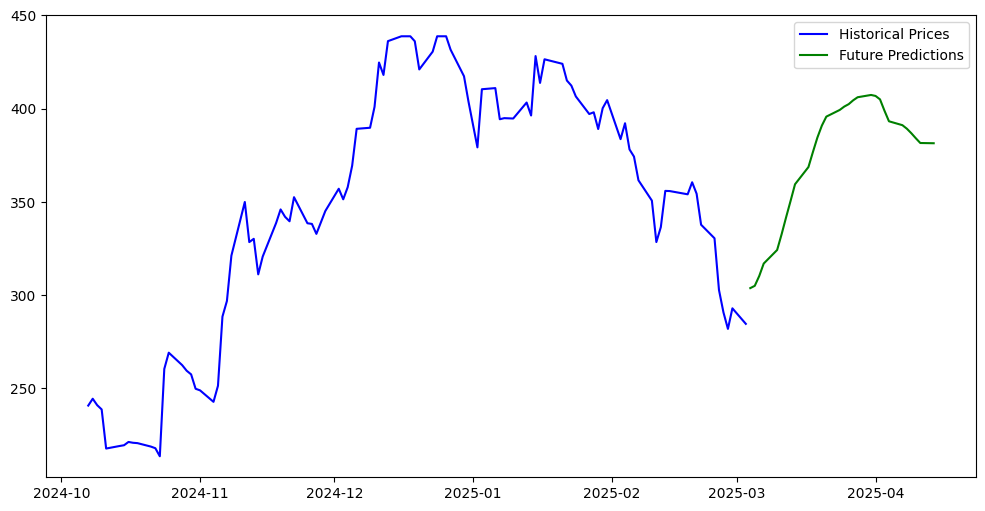

In [55]:
# Comparing prediction to recent trends
plt.figure(figsize=(12,6))
plt.plot(df.index[-100:], df['Close'].values[-100:], label="Historical Prices", color="blue")
plt.plot(future_dates, future_predictions, label="Future Predictions", color="green")
plt.xlabel=("Date")
plt.ylabel=("Stock Price")
plt.legend()
plt.title=("Tesla Stock: Historical vs. Predicted Prices")
plt.show()